왜 이 데이터를 분석하는지
유아사망률과 쥐디피와의 관계
잘사는 국가일수록 보건이 좋으니까

일반적으로 시계열을 볼것

부동산정책이 이런데 오히려 가격이 올라갔다
금리 내렸는데 부동산이 올랐다

이런 흥미로운 주제
시계열 10년치 monthly가 제일 이상적=학습하기에 적합
분석을 해서 보고서 쓰기 목표

프로페셔널하게 써라

오탈자 신빙성 떨어짐

벤치마킹할 보고서
삼성생명 이슈보고표
국민은행 금융보고서

부동산 자료는 국민은행

꼭원자료(데이터)를 써라
내가 만들어

10페이지 정도
참고문헌 페이지 만들어라

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Electric_prod.csv to Electric_prod.csv


In [34]:
df = pd.read_csv("Electric_prod.csv")

In [5]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [6]:
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [8]:
df.isnull().sum()

,0
DATE,0
IPG2211A2N,0


In [9]:
# data type을 확인하고 결측치를 확인하는 이유는 맞는 타입이 아니라 !이런거 일수도 있으니까 대충 가정

In [10]:
df.columns

Index(['DATE', 'IPG2211A2N'], dtype='object')

In [35]:
# 칼럼 이름 바꾸기
df.rename(columns = {"IPG2211A2N" : "production"}, inplace = True)

In [12]:
df.head()

,DATE,production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [36]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   production  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [15]:
df.head()

,DATE,production
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [37]:
# 인덱스를 날짜로 바꾸고 싶다
df.set_index("DATE", inplace = True)

In [17]:
df.head()

,production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


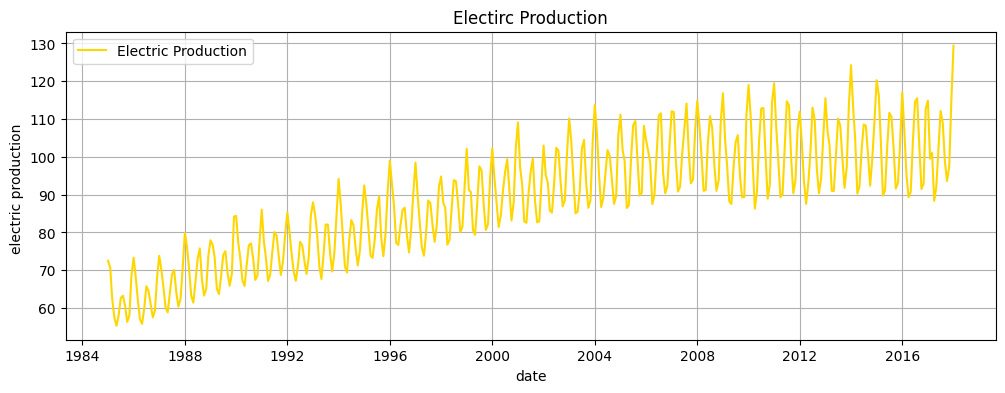

In [24]:
plt.figure(figsize = (12, 4))
plt.plot(df["production"], label = "Electric Production", c = "gold")
plt.title("Electirc Production")
plt.ylabel("electric production ")
plt.xlabel("date")
plt.grid(True)
plt.legend()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
result_add = seasonal_decompose(df["production"], model = "additivity", extrapolate_trend= "freq")

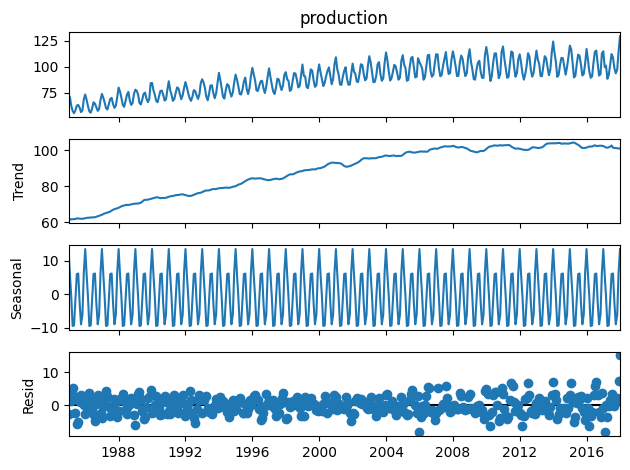

In [29]:
result_add.plot()
plt.show() # resid 0 으로 수렴 = 적합하다. 나라면 로그를 취함

### Trend 의 이해

- trend : long-term movement in data

- rolling average:
  - smooth out short-term fluctuations (단기의 변동 imf같은거)

In [53]:
df["rolling_avg_12month"] = df["production"].rolling(window = 12).mean() # window being term or smth like that
df["rolling_avg_24month"] = df["production"].rolling(window = 24).mean()
df["rolling_avg_36month"] = df["production"].rolling(window = 36).mean()

In [48]:
df.head() # 첫 12개월은 앞에 데이터 없으니까 nan

,production,rolling_avg,rolling_avg_24month,rolling_avg_12month
DATE,,,,
1985-01-01,72.5052,NaN,NaN,NaN
1985-02-01,70.6720,NaN,NaN,NaN
1985-03-01,62.4502,NaN,NaN,NaN
1985-04-01,57.4714,NaN,NaN,NaN
1985-05-01,55.3151,NaN,NaN,NaN


In [40]:
df.head(30)

,production,rolling_avg
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,NaN
1985-03-01,62.4502,NaN
1985-04-01,57.4714,NaN
1985-05-01,55.3151,NaN
1985-06-01,58.0904,NaN
1985-07-01,62.6202,NaN
1985-08-01,63.2485,NaN
1985-09-01,60.5846,NaN


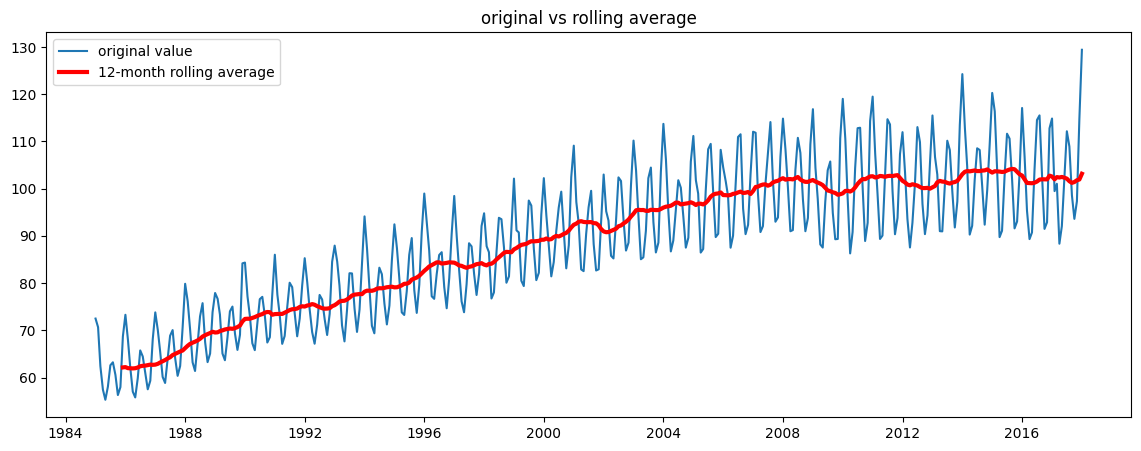

In [43]:
plt.figure(figsize = (14, 5))
plt.plot(df["production"], label = "original value")
plt.plot(df["rolling_avg"], label = "12-month rolling average", c = "r", linewidth = "3")
plt.title("original vs rolling average")
plt.legend()
plt.show()

In [45]:
# 전력은 12개월 rolling 이 좋다 계절성
# 12개월의 롤링은 단기의 변동성을 스무드 시킨다 그리고 장기의 트렌드를 볼 수 있음 이상기후면 24개월으로

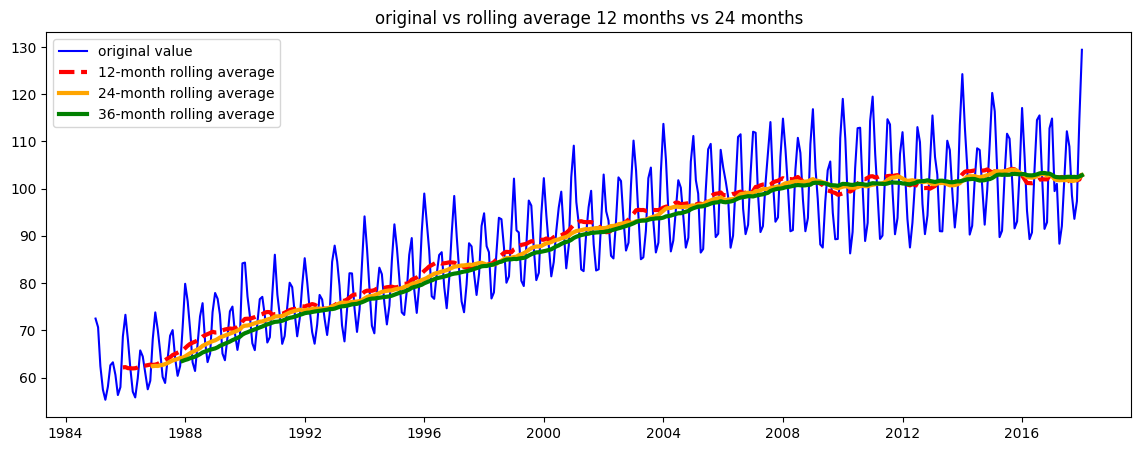

In [55]:
plt.figure(figsize = (14, 5))
plt.plot(df["production"], label = "original value", c = "blue")
plt.plot(df["rolling_avg_12month"], label = "12-month rolling average", c = "r", linewidth = "3", linestyle = "--")
plt.plot(df["rolling_avg_24month"], label = "24-month rolling average", c = "orange", linewidth = "3")
plt.plot(df["rolling_avg_36month"], label = "36-month rolling average", c = "green", linewidth = "3")
plt.title("original vs rolling average 12 months vs 24 months")
plt.legend()
plt.show()